In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import data_loading

# Clone the repo


In [3]:
# !git clone https://github.com/leanhduc123/NLP_Zalo_QA.git zaloqa
# %cd zaloqa

# Load data


In [4]:
zalo_loader = data_loading.ZaloLoader()
zalo_data = pd.read_json("data_json/train.json")
zalo_data

,id,question,title,text,label
0,u7-1570446247_1,Quang Hải giành được chức vô địch U21 quốc gia...,Nguyễn Quang Hải (sinh 1997),"Năm 2013 , Nguyễn Quang Hải giành chức vô địch...",True
1,u7-1570446247_2,Quang Hải giành được chức vô địch U21 quốc gia...,Nguyễn Quang Hải (sinh 1997),"Sau chức vô địch U-21 quốc gia 2013 , Nguyễn Q...",True
2,u7-1570446247_0,Quang Hải giành được chức vô địch U21 quốc gia...,Nguyễn Quang Hải (sinh 1997),Anh bắt đầu gia nhập lò đào tạo trẻ Hà Nội T&T...,False
3,u7-1570446247_3,Quang Hải giành được chức vô địch U21 quốc gia...,Nguyễn Quang Hải (sinh 1997),"Năm 2011 , Nguyễn Quang Hải mới 14 tuổi được g...",False
4,u7-1570445661_0,Mỗi hiệp bóng đá kéo dài bao lâu,Bóng đá,Một trận đấu bóng đá thông thường có hai hiệp ...,True
...,...,...,...,...,...
18103,u6-1551268099_0,Thành phố nào là thủ đô của Costa Rica,"San José, Costa Rica",San José (tiếng Tây Ban Nha: San José; ) là th...,True
18104,u6-1551268099_1,Thành phố nào là thủ đô của Costa Rica,Costa Rica,Vì Costa Rica có địa hình đa dạng nhiều núi no...,True
18105,u6-1551268099_2,Thành phố nào là thủ đô của Costa Rica,"San José, Costa Rica","Với địa vị là thủ đô, San José là nơi đặt trụ ...",True
18106,u6-1551268099_4,Thành phố nào là thủ đô của Costa Rica,"Santa Teresa, Costa Rica",Santa Teresa là một thị xã nhỏ ở tỉnh Puntaren...,True


In [5]:
squad_vn_data = pd.read_csv("data/squad-v2.0-mailong25.csv")
squad_vn_data = squad_vn_data.append(pd.read_csv("data/squad_vi_dev_v2.0_ImpossibleAnswer.csv"))
squad_vn_data

,id,question,title,text,answer,label
0,37bce7cfc34d4bf9b81e340c5345384c,Ai là thủ tướng Ấn Độ hiện tại,Ai là thủ tướng Ấn Độ hiện tại,Thủ tướng Ấn Độ sắp sang Mỹ gặp ông Trump mua ...,NaN,True
1,8af074fb95c941b485c120e2ddbcc7c8,Ai là thủ tướng Ấn Độ hiện tại,Ai là thủ tướng Ấn Độ hiện tại,Narendra Damodardas Modi ( tiếng Gujarat : નરે...,Narendra Damodardas Modi,False
2,4d8ce4afc5ed4364ad70fc4384eff08b,Ai là thủ tướng Ấn Độ hiện tại,Ai là thủ tướng Ấn Độ hiện tại,- Google hôm 3/6 đã xin lỗi Thủ tướng Ấn Độ Na...,Narendra Modi,False
3,ded17c6beaa746eebe531b3dd2b0f573,Ai là thủ tướng Ấn Độ hiện tại,Ai là thủ tướng Ấn Độ hiện tại,thủ tướng thăm Ấn Độ Nguyễn Xuân Phúc ASEAN th...,NaN,True
4,4e03f08a78b744a48f0f380441a227f4,Ai là thủ tướng Ấn Độ hiện tại,Ai là thủ tướng Ấn Độ hiện tại,"Tin tức về chủ đề "" Thủ tướng Ấn Độ Narendra M...",Narendra Modi,False
...,...,...,...,...,...,...
5940,5ad28a57d7d075001a4299b3,Lực lượng bảo thủ thường gắn liền với việc chu...,Force,Lực lượng bảo thủ bao gồm những gì?,nonconservative forces,True
5941,5ad28ad0d7d075001a4299cc,Điều gì không có một đối tác số liệu?,Force,Lực lượng bảo thủ thường gắn liền với việc chu...,pound-force,True
5942,5ad28ad0d7d075001a4299cd,Điều gì không có một đối tác số liệu?,Force,Lực lượng bảo thủ thường gắn liền với việc chu...,kilogram-force,True
5943,5ad28ad0d7d075001a4299ce,Lực nào dẫn đến một đơn vị khối lượng thường đ...,Force,Lực lượng bảo thủ thường gắn liền với việc chu...,kilogram-force,True


In [6]:
squad_data = pd.read_csv("data/squad_vi.csv")
squad_data = squad_data.append(pd.read_csv("data/squad_vi_part2.csv"))
squad_data = squad_data.append(pd.read_csv("data/squad_vi_v2.0.csv"))
squad_data

,id,question,title,text,answer,label
0,5733be284776f4190066117e,Có gì ngồi trên đầu trang của Tòa nhà Chính tạ...,translated,"Về mặt kiến ​​trúc, trường có một nhân vật Côn...",bức tượng vàng của Đức Trinh Nữ Maria,False
1,5733be284776f4190066117f,là những gì ở phía trước của Notre Dame Tòa nh...,translated,"Về mặt kiến ​​trúc, trường có một nhân vật Côn...",một bức tượng đồng của Chúa Kitô,False
2,5733be284776f41900661180,Vương Cung Thánh Đường của trái tim Thánh tại ...,translated,"Về mặt kiến ​​trúc, trường có một nhân vật Côn...",Tòa nhà Chính,False
3,5733be284776f41900661181,các Grotto tại Notre Dame là gì?,translated,"Về mặt kiến ​​trúc, trường có một nhân vật Côn...",một nơi Marian cầu nguyện và suy,False
4,5733be284776f41900661182,Mà đã bị cáo buộc Đức Trinh Nữ Maria xuất hiện...,translated,"Về mặt kiến ​​trúc, trường có một nhân vật Côn...",Saint Bernadette Soubirous,False
...,...,...,...,...,...,...
49438,5ad28a57d7d075001a4299b3,Lực lượng bảo thủ thường gắn liền với việc chu...,Force,Lực lượng bảo thủ bao gồm những gì?,nonconservative forces,True
49439,5ad28ad0d7d075001a4299cc,Điều gì không có một đối tác số liệu?,Force,Lực lượng bảo thủ thường gắn liền với việc chu...,pound-force,True
49440,5ad28ad0d7d075001a4299cd,Điều gì không có một đối tác số liệu?,Force,Lực lượng bảo thủ thường gắn liền với việc chu...,kilogram-force,True
49441,5ad28ad0d7d075001a4299ce,Lực nào dẫn đến một đơn vị khối lượng thường đ...,Force,Lực lượng bảo thủ thường gắn liền với việc chu...,kilogram-force,True


# Data analysing

In [7]:
zalo_data.isna().sum()

id          0
question    0
title       0
text        0
label       0
dtype: int64

<AxesSubplot:xlabel='dataset', ylabel='count'>

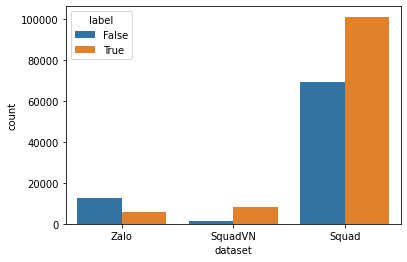

In [8]:
label_count = pd.concat([
    zalo_data.join(pd.Series(np.full(len(zalo_data), 'Zalo'), name='dataset'))[['dataset', 'label']],
    squad_vn_data.join(pd.Series(np.full(len(squad_vn_data), 'SquadVN'), name='dataset'))[['dataset', 'label']],
    squad_data.join(pd.Series(np.full(len(squad_data), 'Squad'), name='dataset'))[['dataset', 'label']]
], axis = 0)
sns.countplot(x='dataset', hue='label', data=label_count)

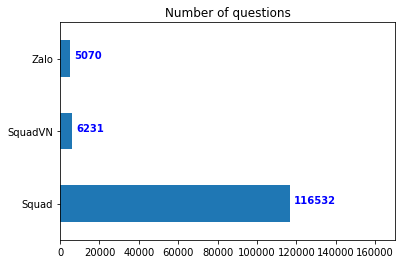

In [9]:
question_count = pd.Series({'Zalo': zalo_data['question'].nunique(),
                            'SquadVN': squad_vn_data['question'].nunique(),
                            'Squad': squad_data['question'].nunique()})
_, ax = plt.subplots()
for i, v in enumerate(question_count):
    ax.text(v + 2000, i, str(v), color='blue', fontweight='bold')
plt.title('Number of questions')
question_count.plot(kind='barh', xlim=(0, 170000)).invert_yaxis()

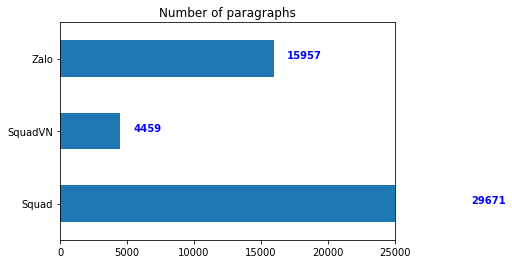

In [10]:
paragraph_count = pd.Series({'Zalo': zalo_data['text'].nunique(),
                            'SquadVN': squad_vn_data['text'].nunique(),
                            'Squad': squad_data['text'].nunique()})
_, ax = plt.subplots()
for i, v in enumerate(paragraph_count):
    ax.text(v + 1000, i, str(v), color='blue', fontweight='bold')
plt.title('Number of paragraphs')
paragraph_count.plot(kind='barh', xlim=(0, 25000)).invert_yaxis()

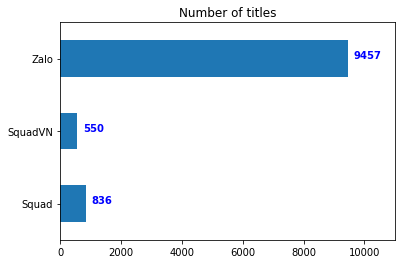

In [11]:
title_count = pd.Series({'Zalo': zalo_data['title'].nunique(),
                         'SquadVN': squad_vn_data['title'].nunique(),
                         'Squad': squad_data['title'].nunique()})
_, ax = plt.subplots()
for i, v in enumerate(title_count):
    ax.text(v + 200, i, str(v), color='blue', fontweight='bold')
plt.title('Number of titles')
title_count.plot(kind='barh', xlim=(0, 11000)).invert_yaxis()

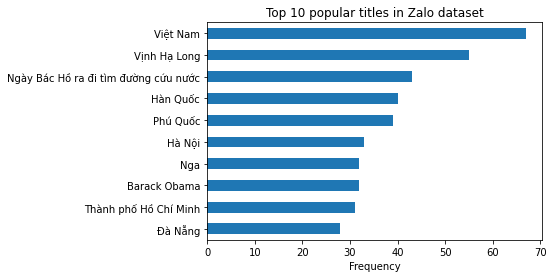

In [12]:
plt.title('Top 10 popular titles in Zalo dataset')
plt.xlabel('Frequency')
zalo_data['title'].value_counts()[1:11].plot(kind='barh').invert_yaxis()

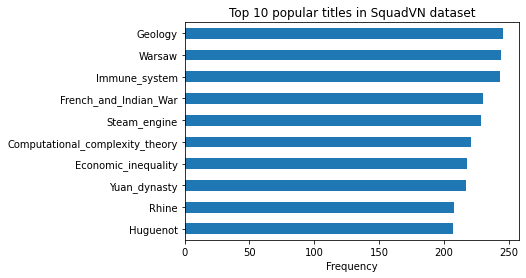

In [13]:
plt.title('Top 10 popular titles in SquadVN dataset')
plt.xlabel('Frequency')
squad_vn_data['title'].value_counts()[1:11].plot(kind='barh').invert_yaxis()

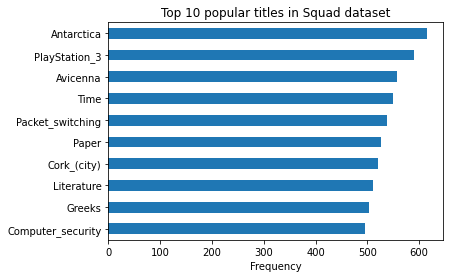

In [14]:
plt.title('Top 10 popular titles in Squad dataset')
plt.xlabel('Frequency')
squad_data['title'].value_counts()[1:11].plot(kind='barh').invert_yaxis()

<AxesSubplot:title={'center':'Length of question (Zalo)'}, xlabel='Length', ylabel='Frequency'>

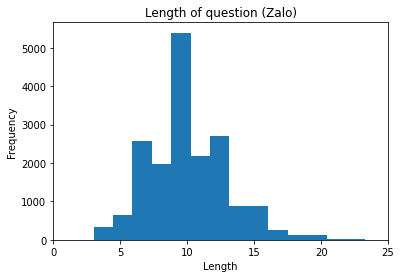

In [15]:
plt.title('Length of question (Zalo)')
plt.xlabel('Length')
zalo_data['question'].str.split(' ').str.len().plot.hist(xlim=(0, 25), bins=20)

<AxesSubplot:title={'center':'Length of question in tokens (Zalo)'}, xlabel='Length', ylabel='Frequency'>

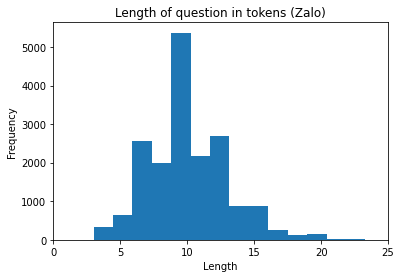

In [16]:
import tokenizing
plt.title('Length of question in tokens (Zalo)')
plt.xlabel('Length')
zalo_data['question'].apply(tokenizing.tokenize).str.len().plot.hist(xlim=(0, 25), bins=20)

<AxesSubplot:title={'center':'Length of question (SquadVN)'}, xlabel='Length', ylabel='Frequency'>

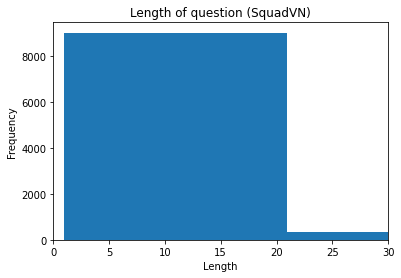

In [17]:
plt.title('Length of question (SquadVN)')
plt.xlabel('Length')
squad_vn_data['question'].str.split(' ').str.len().plot.hist(xlim=(0, 30), bins=20)

<AxesSubplot:title={'center':'Length of question (Squad)'}, xlabel='Length', ylabel='Frequency'>

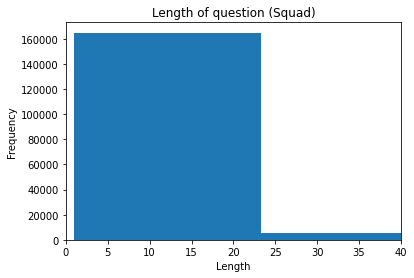

In [18]:
plt.title('Length of question (Squad)')
plt.xlabel('Length')
squad_data['question'].str.split(' ').str.len().plot.hist(xlim=(0, 40), bins=20)

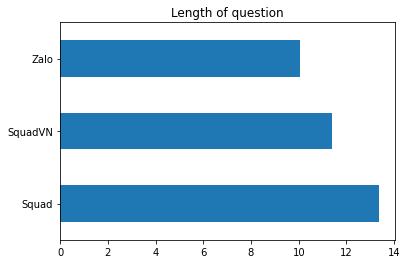

In [19]:
question_len = pd.Series({'Zalo': zalo_data['question'].str.split(' ').str.len().mean(),
                          'SquadVN': squad_vn_data['question'].str.split(' ').str.len().mean(),
                          'Squad': squad_data['question'].str.split(' ').str.len().mean()})
plt.title('Length of question')
question_len.plot(kind='barh').invert_yaxis()

<AxesSubplot:title={'center':'Length of paragraph (Zalo)'}, xlabel='Length', ylabel='Frequency'>

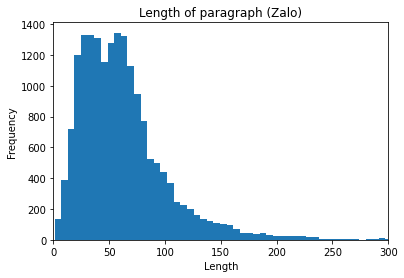

In [20]:
plt.title('Length of paragraph (Zalo)')
plt.xlabel('Length')
zalo_data['text'].str.split(' ').str.len().plot.hist(xlim=(0, 300), bins=100)

<AxesSubplot:title={'center':'Length of paragraph in tokens'}, xlabel='Length', ylabel='Frequency'>

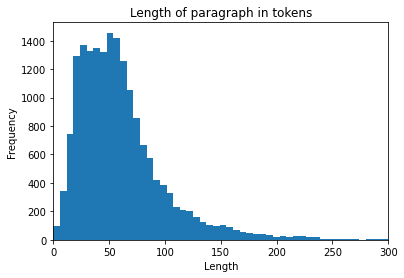

In [21]:
plt.title('Length of paragraph in tokens')
plt.xlabel('Length')
zalo_data['text'].apply(tokenizing.tokenize).str.len().plot.hist(xlim=(0, 300), bins=100)

<AxesSubplot:title={'center':'Length of paragraph (SquadVN)'}, xlabel='Length', ylabel='Frequency'>

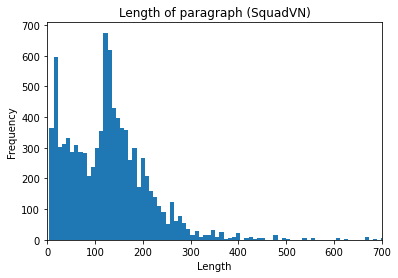

In [22]:
plt.title('Length of paragraph (SquadVN)')
plt.xlabel('Length')
squad_vn_data['text'].str.split(' ').str.len().plot.hist(xlim=(0, 700), bins=100)

<AxesSubplot:title={'center':'Length of paragraph (Squad)'}, xlabel='Length', ylabel='Frequency'>

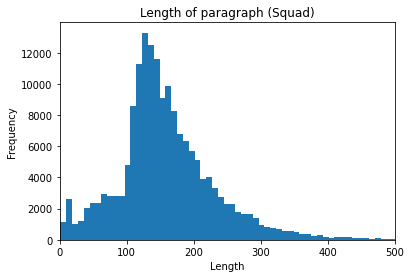

In [23]:
plt.title('Length of paragraph (Squad)')
plt.xlabel('Length')
squad_data['text'].str.split(' ').str.len().plot.hist(xlim=(0, 500), bins=100)

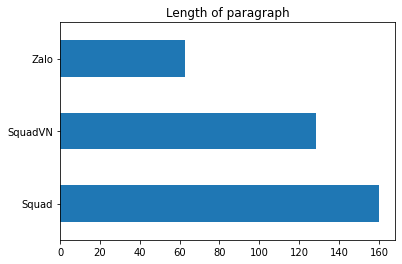

In [25]:
paragraph_len = pd.Series({'Zalo': zalo_data['text'].str.split(' ').str.len().mean(),
                          'SquadVN': squad_vn_data['text'].str.split(' ').str.len().mean(),
                          'Squad': squad_data['text'].str.split(' ').str.len().mean()})
plt.title('Length of paragraph')
paragraph_len.plot(kind='barh').invert_yaxis()